In [1]:
import zipfile
import os
import tensorflow as tf
file_path="../Tensorflow/horse-or-human.zip"
file_ref=zipfile.ZipFile(file_path,'r')
file_ref.extractall("Dataset/")
file_ref.close()

In [2]:
horse_dir="Dataset/horses"
human_dir="Dataset/humans"
horses_file=os.listdir(horse_dir)
print(horses_file[:10])
human_file=os.listdir(human_dir)
print(human_file[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


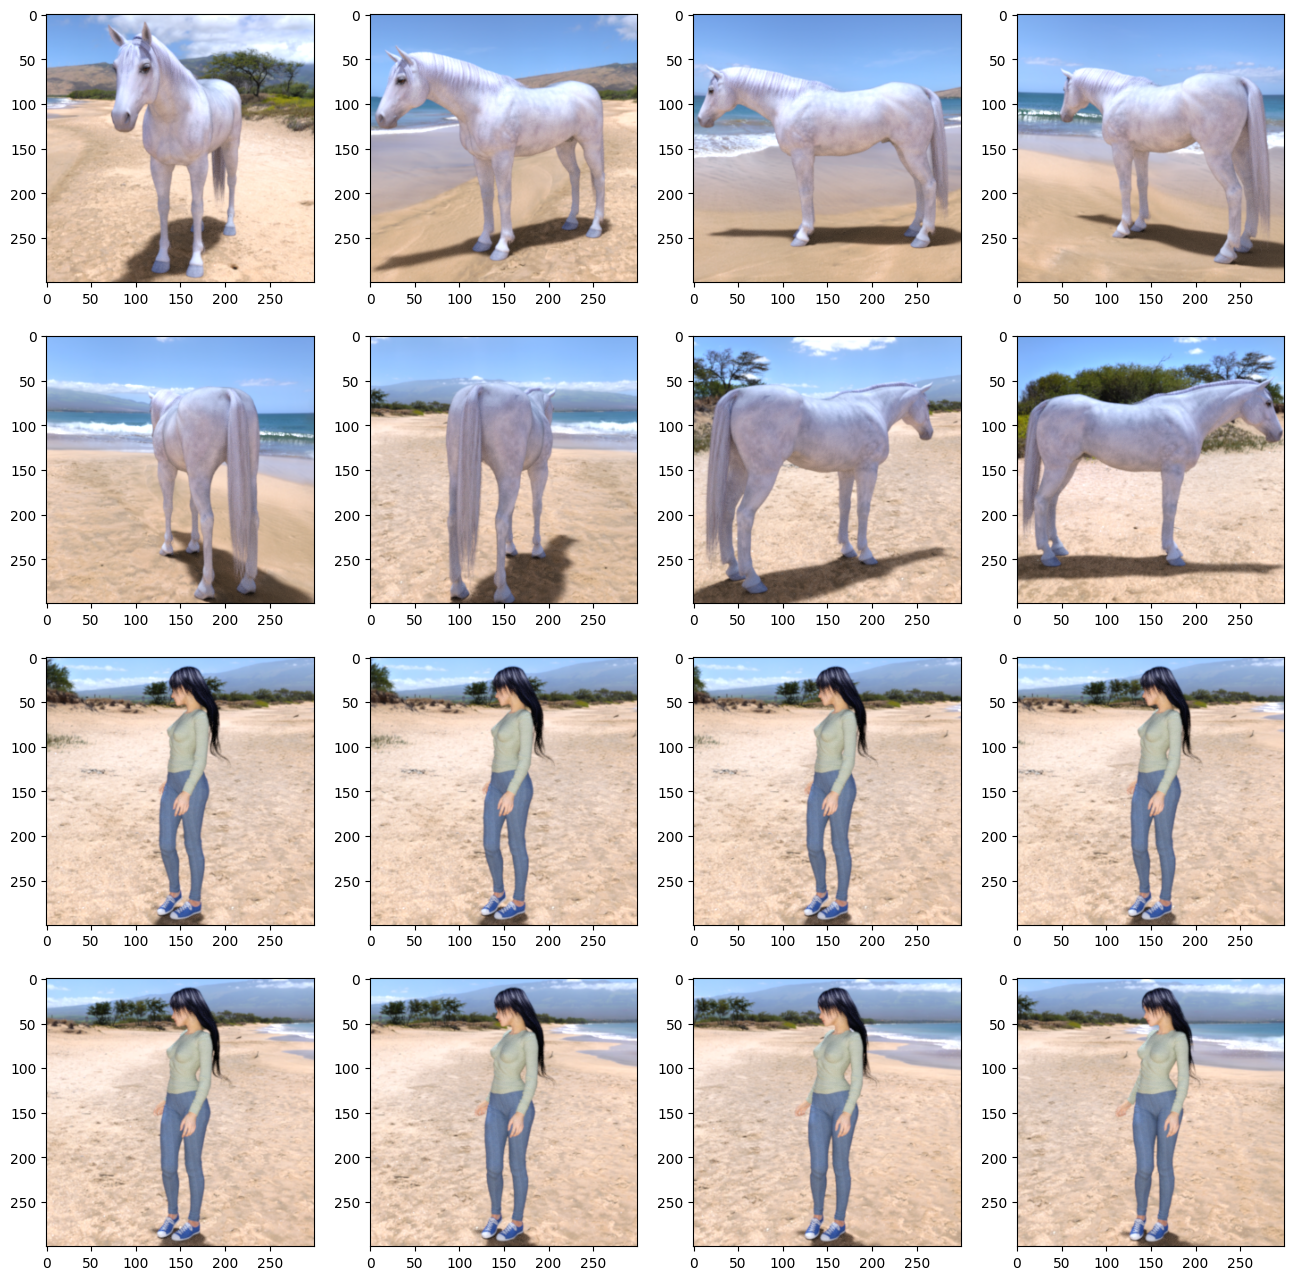

In [3]:
import matplotlib.pyplot as plt
fig=plt.gcf()
fig.set_size_inches(16,16)

horse_images=[os.path.join(horse_dir,name) for name in horses_file[:8]]
human_images=[os.path.join(human_dir,name) for name in human_file[:8]]
for i,file in enumerate(horse_images+human_images):
    plt.subplot(4,4,1+i)
    img=plt.imread(file)
    plt.imshow(img)

plt.show()

In [4]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [6]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen=ImageDataGenerator(rescale=(1/255))
image_generator=image_gen.flow_from_directory(
    "Dataset/",
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [12]:
model.fit(image_generator,steps_per_epoch=8,epochs=15,)

Epoch 1/15
8/8 [==============================] - 33s 4s/step - loss: 0.0289 - accuracy: 0.9900
Epoch 2/15
8/8 [==============================] - 34s 4s/step - loss: 1.7234 - accuracy: 0.8621
Epoch 3/15
8/8 [==============================] - 35s 4s/step - loss: 0.0744 - accuracy: 0.9733
Epoch 4/15
8/8 [==============================] - 34s 4s/step - loss: 0.0173 - accuracy: 0.9967
Epoch 5/15
8/8 [==============================] - 35s 4s/step - loss: 0.0066 - accuracy: 0.9989
Epoch 6/15
8/8 [==============================] - 37s 4s/step - loss: 0.0046 - accuracy: 0.9989
Epoch 7/15
8/8 [==============================] - 37s 4s/step - loss: 0.0028 - accuracy: 0.9989
Epoch 8/15
8/8 [==============================] - 38s 5s/step - loss: 0.0021 - accuracy: 1.0000
Epoch 9/15
8/8 [==============================] - 38s 5s/step - loss: 0.0020 - accuracy: 1.0000
Epoch 10/15
8/8 [==============================] - 37s 4s/step - loss: 0.2851 - accuracy: 0.9255
Epoch 11/15
8/8 [======================

In [13]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import io
from IPython.display import display
from ipywidgets import FileUpload

# Create upload widget
upload = FileUpload()
display(upload)

# Define prediction function
def predict_on_upload(change):
   

    # Predict


FileUpload(value=(), description='Upload')

In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare image
img_path = "G:/Camera/20210629_183502.jpg"  # replace with your image path
img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Predict
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])

if classes[0]>0.5:
    print("The image is a human")
else:
    print("The image is a horse")

1/1 [==============================] - 0s 50ms/step
[0.99988645]
The image is a human


1/1 [==============================] - 1s 985ms/step


C:\Users\nirob\AppData\Local\Temp\ipykernel_15480\2560714743.py:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\nirob\AppData\Local\Temp\ipykernel_15480\2560714743.py:48: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


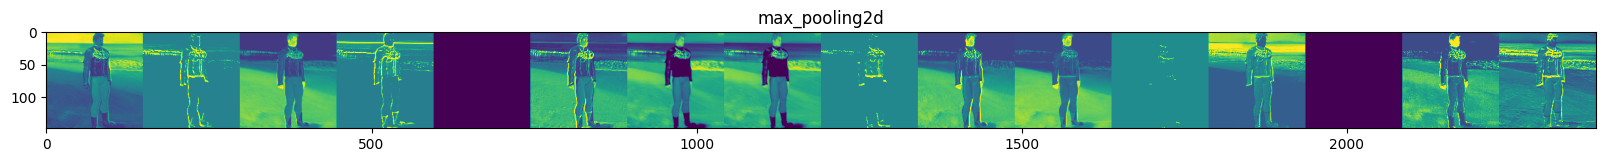

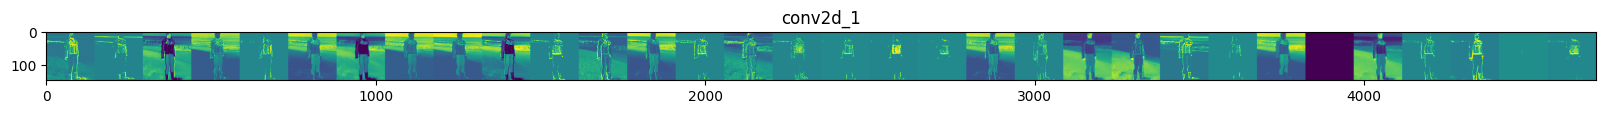

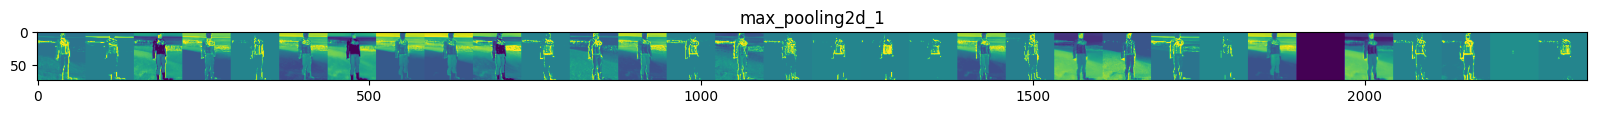

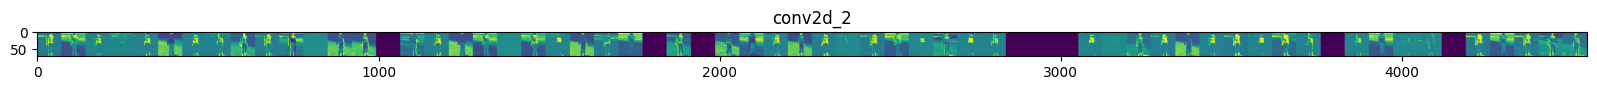

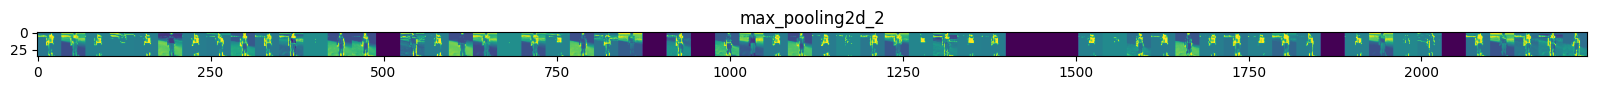

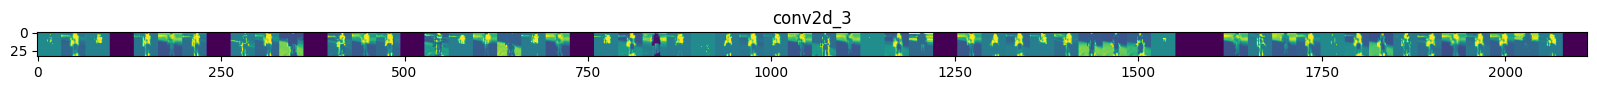

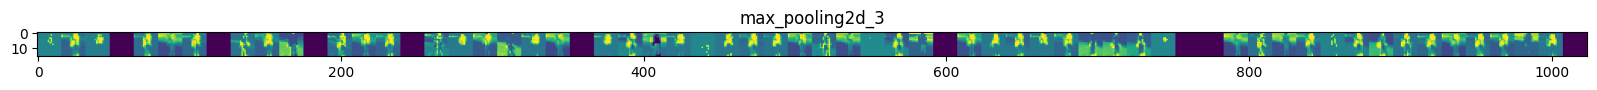

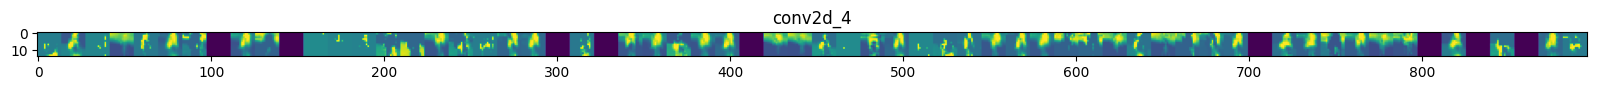

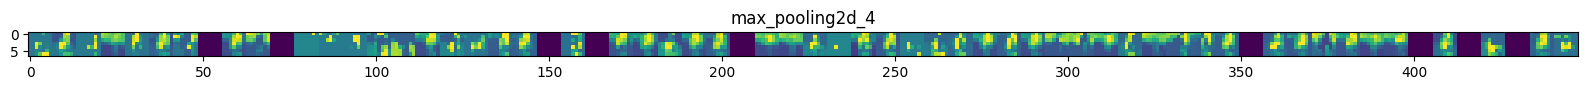

In [10]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(horse_dir, f) for f in horses_file]
human_img_files = [os.path.join(human_dir, f) for f in human_file]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')